In [1]:
import sys as _sys
import os

currentPath = os.path.abspath(os.getcwd())

split = currentPath.split("Project")
pathToPythonScripts = split[0] + "Project/src/"

_sys.path.insert(0, pathToPythonScripts)

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec, colors

from DiracGAN import *

# Simultaneous

In [3]:
%run ../src/DiracGAN.py

nSteps = 1000
step   = 0.2
thetasSim = torch.zeros(size=(nSteps+1,))
psisSim   = torch.zeros(size=(nSteps+1,))

thetasSim[0] = 1.
psisSim[0]   = 1.

simDGAN = SimultaneousDGAN(step)

for i in range(nSteps):
    thetasSim[i+1], psisSim[i+1] = simDGAN.UpdateOperator(thetasSim[i].reshape(1,), psisSim[i].reshape(1,))

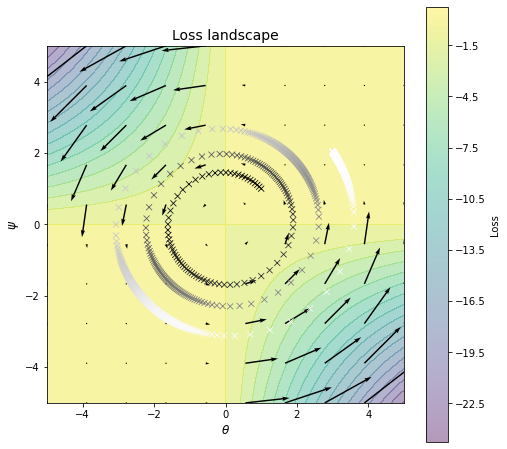

In [4]:
simDGAN.PlotTrajectory(thetasSim, psisSim)

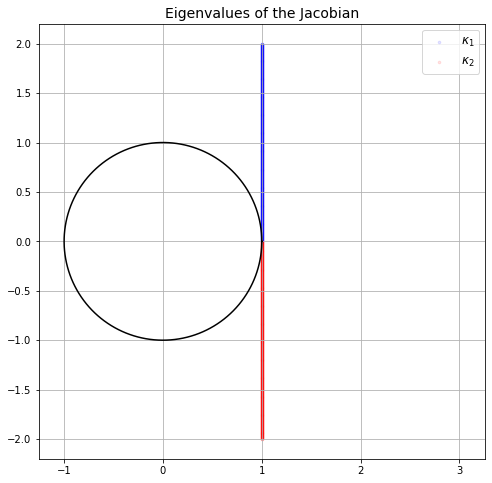

In [5]:
simDGAN.PlotJacobianEigenvalues()

# Alternating

In [6]:
%run ../src/DiracGAN.py

nSteps = 500
step   = 0.2
thetasAlt = torch.zeros(size=(nSteps+1,))
psisAlt   = torch.zeros(size=(nSteps+1,))

thetasAlt[0] = 1.
psisAlt[0]   = 1.

altDGAN = AlternatingDGAN(step)

for i in range(nSteps):
    thetasAlt[i+1], psisAlt[i+1] = altDGAN.UpdateOperator(thetasAlt[i].reshape(1,), psisAlt[i].reshape(1,))

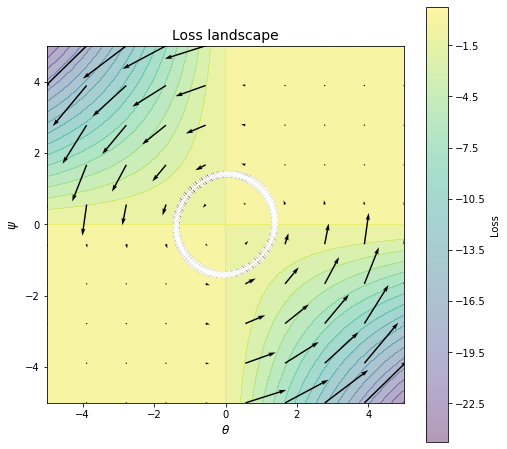

In [7]:
altDGAN.PlotTrajectory(thetasAlt, psisAlt)

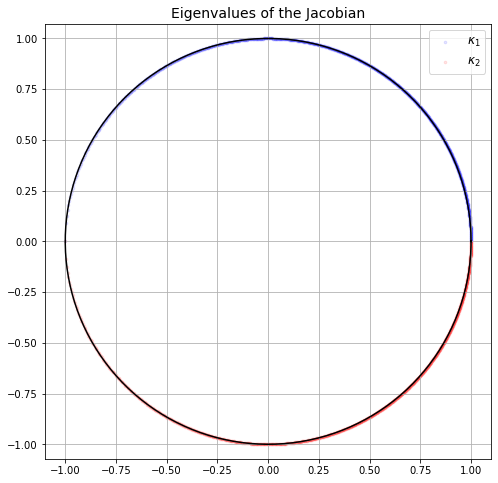

In [8]:
altDGAN.PlotJacobianEigenvalues()

# CLC Simultaneous DiracGAN

In [22]:
%run ../src/DiracGAN.py

nSteps = 1000 # 100000 is the limit
weightReg = 0.05
step   = 0.2
thetasCLCS = torch.zeros(size=(nSteps+1,))
psisCLCS   = torch.zeros(size=(nSteps+1,))

thetasCLCS[0] = 1.
psisCLCS[0]   = 1.

CLC_SDGAN = CLC_SDGAN(step, weightReg)

for i in range(nSteps):
    thetasCLCS[i+1], psisCLCS[i+1] = CLC_SDGAN.UpdateOperator(thetasCLCS[i].reshape(1,), psisCLCS[i].reshape(1,))

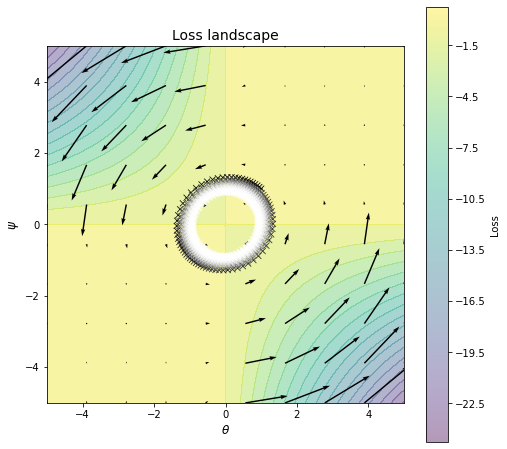

In [23]:
CLC_SDGAN.PlotTrajectory(thetasCLCS, psisCLCS)

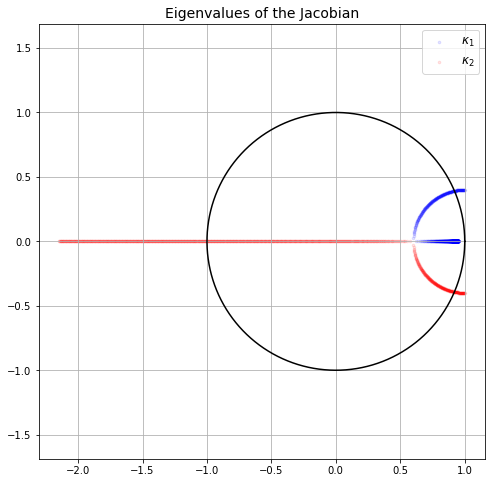

In [11]:
CLC_SDGAN.PlotJacobianEigenvalues()

/var/folders/n_/96jdh54s7ql1w8rmkxx88xpc0000gp/T/ipykernel_51599/3079809164.py:12: RuntimeWarning: invalid value encountered in sqrt
  mask = np.logical_or(np.logical_and(weightRegPlot < 1, stepPlot < 4 * weightRegPlot), np.logical_and(weightRegPlot >= 1, stepPlot < 4 * (weightRegPlot - np.sqrt(weightRegPlot**2 -1))))


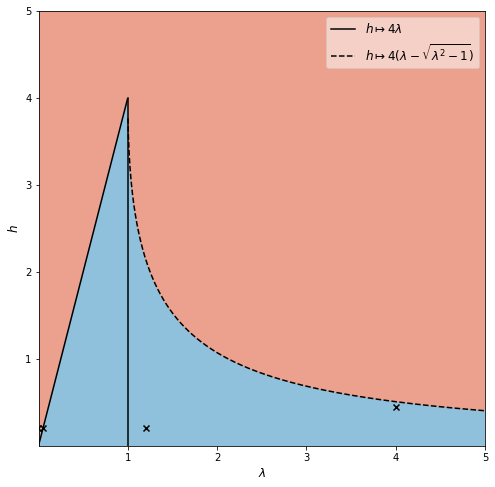

In [12]:
nVals = 1000
%run ../src/VisUtils.py

steps = np.linspace(0.001, 5., nVals)

weightRegs = np.linspace(0.001, 5., nVals)
my_cmap = cmap_map(lambda x: 3*x/4 + 0.25, matplotlib.cm.RdBu)

exps = np.array([[0., 0.2], [0.05, 0.2], [1.2, 0.2], [4., 0.45]])

weightRegPlot, stepPlot = np.meshgrid(np.linspace(0.001, 5., nVals), np.linspace(0.001, 5., nVals), indexing="ij")
mask = np.logical_or(np.logical_and(weightRegPlot < 1, stepPlot < 4 * weightRegPlot), np.logical_and(weightRegPlot >= 1, stepPlot < 4 * (weightRegPlot - np.sqrt(weightRegPlot**2 -1))))
plt.figure(figsize=(8, 8))
plt.pcolormesh(weightRegPlot, stepPlot, 0.25 + 0.5*np.array(mask, dtype=np.float32), antialiased=True, shading="gouraud", cmap=my_cmap, vmin=0., vmax=1., alpha=1.) #nearest, gouraud
left, right = plt.xlim()
bottom, top = plt.ylim()
plt.plot(np.ones_like(steps)[steps<4], steps[steps<4], c='k')
plt.plot(weightRegs[weightRegs<1], 4*weightRegs[weightRegs<1], c='k', label=r"$h\mapsto4\lambda$")
plt.plot(weightRegs[weightRegs>=1], 4 * (weightRegs[weightRegs>=1]-np.sqrt(weightRegs[weightRegs>=1]**2 - 1)), c='k', linestyle="--", label=r"$h\mapsto4(\lambda - \sqrt{\lambda^2-1})$")
plt.scatter(exps[:, 0], exps[:, 1], c="k", marker='x', linewidths=1.5)
plt.xlabel(r"$\lambda$", fontsize=12)
plt.ylabel(r"$h$", fontsize=12)
# plt.title(r"Areas of convergence for SimGDA", fontsize=14)
plt.xlim(left, right)
plt.ylim(bottom, top)
plt.legend(fontsize=12, framealpha=0.5)
plt.show()

# CLC Alternating DiracGAN

In [20]:
%run ../src/DiracGAN.py

nSteps = 1000 # 100000 is the limit
weightReg = 0.05
step   = 0.2
thetasCLCA = torch.zeros(size=(nSteps+1,))
psisCLCA   = torch.zeros(size=(nSteps+1,))

thetasCLCA[0] = 1.
psisCLCA[0]   = 1.

CLC_ADGAN = CLC_ADGAN(step, weightReg)

for i in range(nSteps):
    thetasCLCA[i+1], psisCLCA[i+1] = CLC_ADGAN.UpdateOperator(thetasCLCA[i].reshape(1,), psisCLCA[i].reshape(1,))

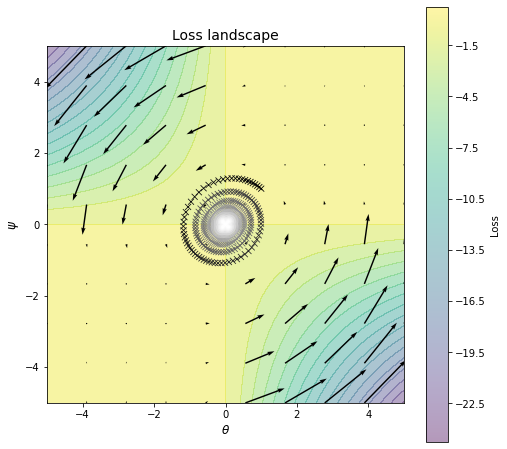

In [21]:
CLC_ADGAN.PlotTrajectory(thetasCLCA, psisCLCA)

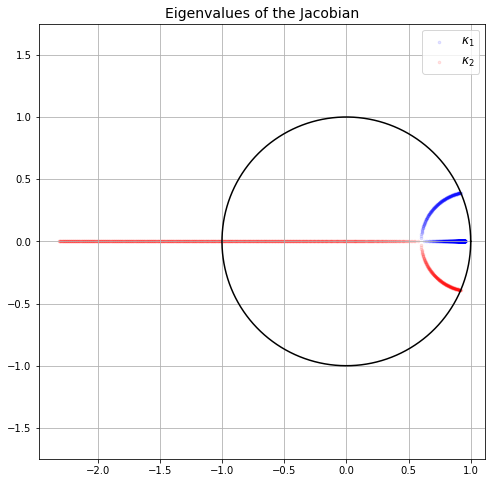

In [15]:
CLC_ADGAN.PlotJacobianEigenvalues()

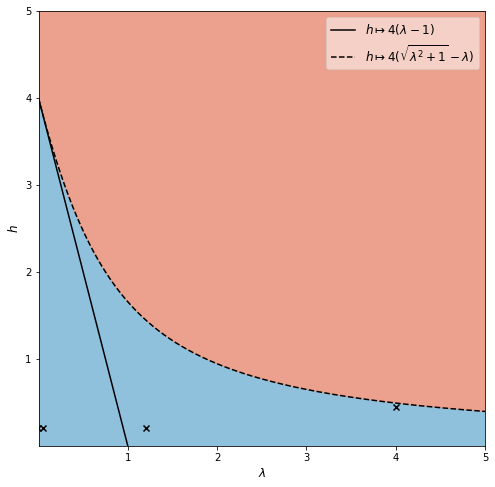

In [16]:
nVals = 1000
%run ../src/VisUtils.py

weightRegs = np.linspace(0.001, 5., nVals)

my_cmap = cmap_map(lambda x: 3*x/4 + 0.25, matplotlib.cm.RdBu)

exps = np.array([[0., 0.2], [0.05, 0.2], [1.2, 0.2], [4., 0.45]])

weightRegPlot, stepPlot = np.meshgrid(np.linspace(0.001, 5., nVals), np.linspace(0.001, 5., nVals), indexing="ij")
mask = np.logical_or(weightRegPlot < 1 - stepPlot / 4, np.logical_and(weightRegPlot >= 1 - stepPlot / 4, stepPlot < 4 * (np.sqrt(weightRegPlot**2 + 1) - weightRegPlot)))
plt.figure(figsize=(8, 8))
plt.pcolormesh(weightRegPlot, stepPlot, 0.25 + 0.5*np.array(mask, dtype=np.float32), antialiased=True, shading="gouraud", cmap=my_cmap, vmin=0., vmax=1., alpha=1.) #nearest, gouraud
left, right = plt.xlim()
bottom, top = plt.ylim()
plt.plot(weightRegs, 4*(1-weightRegs), c='k', label=r"$h\mapsto4(\lambda-1)$")
plt.plot(weightRegs, 4 * (np.sqrt(weightRegs**2 + 1) - weightRegs), c='k', linestyle="--", label=r"$h\mapsto4(\sqrt{\lambda^2+1} - \lambda)$")
plt.scatter(exps[:, 0], exps[:, 1], c="k", marker='x', linewidths=1.5)
plt.xlabel(r"$\lambda$", fontsize=12)
plt.ylabel(r"$h$", fontsize=12)
# plt.title(r"Areas of convergence for SimGDA", fontsize=14)
plt.xlim(left, right)
plt.ylim(bottom, top)
plt.legend(fontsize=12, framealpha=0.5)
plt.show()

# Convergence rate

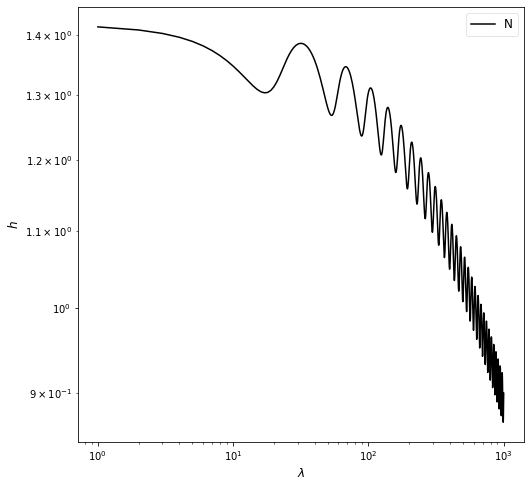

In [24]:
xSteps   = torch.arange(1, thetasCLCS.shape[0]+1)
distCLCS = torch.sqrt(thetasCLCS**2 + psisCLCS**2)

plt.figure(figsize=(8, 8))
# left, right = plt.xlim()
# bottom, top = plt.ylim()
plt.loglog(xSteps, distCLCS, c='k', label=r"N")
plt.xlabel(r"$\lambda$", fontsize=12)
plt.ylabel(r"$h$", fontsize=12)
# plt.title(r"Areas of convergence for SimGDA", fontsize=14)
# plt.xlim(left, right)
# plt.ylim(bottom, top)
plt.legend(fontsize=12, framealpha=0.5)
plt.show()

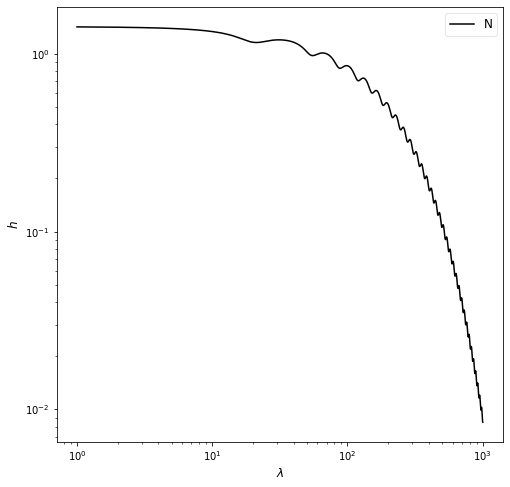

In [25]:
xSteps   = torch.arange(1, thetasCLCA.shape[0]+1)
distCLCA = torch.sqrt(thetasCLCA**2 + psisCLCA**2)

plt.figure(figsize=(8, 8))
# left, right = plt.xlim()
# bottom, top = plt.ylim()
plt.loglog(xSteps, distCLCA, c='k', label=r"N")
plt.xlabel(r"$\lambda$", fontsize=12)
plt.ylabel(r"$h$", fontsize=12)
# plt.title(r"Areas of convergence for SimGDA", fontsize=14)
# plt.xlim(left, right)
# plt.ylim(bottom, top)
plt.legend(fontsize=12, framealpha=0.5)
plt.show()

In [17]:
# thetasQuiver, psisQuiver = torch.meshgrid(torch.linspace(-5, 5, 10), torch.linspace(-5, 5, 10), indexing="ij")
# newThetasQuiver, newPsisQuiver = UpdateOperatorAlt(thetasQuiver.reshape(-1,), psisQuiver.reshape(-1,), step)
# deltaThetasQuiver = newThetasQuiver.reshape(10, 10) - thetasQuiver
# deltaPsisQuiver = newPsisQuiver.reshape(10, 10) - psisQuiver

# gs = gridspec.GridSpec(nrows=1, ncols=1, height_ratios=[1], width_ratios=[1])
# fig = plt.figure(figsize=(8, 8))
# axTmp = plt.subplot(gs[0, 0])
# cs = axTmp.contourf(thetas, psis, losses, levels=20, alpha=0.4)
# axTmp.quiver(thetasQuiver, psisQuiver, deltaThetasQuiver, deltaPsisQuiver, width=0.004)
# axTmp.scatter(thetasAlt, psisAlt, c=(np.arange(thetasSim.shape[0])[::-1])**3, marker='x', cmap='Greys', alpha=1., linewidths=0.8)
# axTmp.set_xlabel(r"$\theta$", fontsize=12)
# axTmp.set_ylabel(r"$\psi$", fontsize=12)
# axTmp.set_title("Loss landscape", fontsize=14)
# axTmp.axis('scaled')
# norm = colors.Normalize(vmin=cs.cvalues.min(), vmax=cs.cvalues.max())
# sm = plt.cm.ScalarMappable(norm=norm, cmap=cs.cmap)
# sm.set_array([])
# cbar = plt.colorbar(sm, ticks=cs.levels[::2], alpha=0.4)
# cbar.set_label('Loss')
# plt.show()